# Problem Statement

In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

# Introduction to Dataset

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy
#from google.colab import files
import io
import seaborn
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
#uploaded = files.upload()
loan_df = pandas.read_csv("loan.csv")
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Getting the shape of the dataframe

In [4]:
loan_df.shape


(39717, 111)

As it can be seen that we have 111 columns.We will now remove the unnecessary columns which are not requried.Getting the list of the columns

In [5]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Cleaning the Dataframe

Checking the columns which have NA values.Some of the columns will have all the columns as NA.As the number of NA values equal the row count in the dataframe

In [6]:
loan_df.isna().sum().sort_values(ascending =False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

We have seen from above that there are columns where all the values are NA.So we will drop those columns from the dataset

In [7]:
loan_df.dropna(how='all',axis=1,inplace=True)

Checking the shape of the dataframe again

In [8]:
loan_df.shape

(39717, 57)

Checking columns which have unique values.If some columns have only 1 unique value then those columns will not play any affect on Loan Charge Off

In [9]:
columns=loan_df.nunique()
columns

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

So we are dropping those columns from the dataframe as they won't be having any effect on the outcome of the loan

In [10]:
single_values_columns=columns[columns.values==1]

Name of the columns with single value in them are as below:
1.  pymnt_plan
2.  initial_list_status
3.  collections_12_mths_ex_med
4.  policy_code
5.  application_type
6.  acc_now_delinq
7.  chargeoff_within_12_mths
8.  delinq_amnt
9.  tax_liens

In [11]:
single_values_columns.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [12]:
loan_df.drop(list(single_values_columns.index),axis=1,inplace=True)

Checking the shape of the dataframe

In [13]:
loan_df.shape

(39717, 48)

In [14]:
# print data type and unique value information for each column
for column in loan_df.columns:
    print(f"Column '{column}' - dtype: {loan_df[column].dtype}, unique values: {loan_df[column].nunique()}")

Column 'id' - dtype: int64, unique values: 39717
Column 'member_id' - dtype: int64, unique values: 39717
Column 'loan_amnt' - dtype: int64, unique values: 885
Column 'funded_amnt' - dtype: int64, unique values: 1041
Column 'funded_amnt_inv' - dtype: float64, unique values: 8205
Column 'term' - dtype: object, unique values: 2
Column 'int_rate' - dtype: object, unique values: 371
Column 'installment' - dtype: float64, unique values: 15383
Column 'grade' - dtype: object, unique values: 7
Column 'sub_grade' - dtype: object, unique values: 35
Column 'emp_title' - dtype: object, unique values: 28820
Column 'emp_length' - dtype: object, unique values: 11
Column 'home_ownership' - dtype: object, unique values: 5
Column 'annual_inc' - dtype: float64, unique values: 5318
Column 'verification_status' - dtype: object, unique values: 3
Column 'issue_d' - dtype: object, unique values: 55
Column 'loan_status' - dtype: object, unique values: 3
Column 'url' - dtype: object, unique values: 39717
Column 

Removing below columns from the dataframe as these won't affect the loan rejection outcome.We got the definition of these columns from the Data dictionary

1. id-> A unique LC assigned ID for the loan listing.
2. member_id-> A unique LC assigned Id for the borrower member.
3. url-> URL for the LC page with listing data.
4. zip_code-> The first 3 numbers of the zip code provided by the borrower in the loan application.
5. emp_title - The job title supplied by the Borrower when applying for the loan.Additionally this information got changed to employee name after 9/23/2013. Further it has text record with subjective information that does not add uniformity with each other.hence should be removed
6. title - The loan title provided by the borrower , there are 19615 unique entries for this column and the information is more a remarks and would not add value to the EDA 
7. desc - Loan description provided by the borrower , there are 26527 unique entries for this columns and the information is desc with maximum values as unique.



In [15]:
columns_to_drop=['id','member_id','url','zip_code','emp_title','title','desc']
loan_df.drop(columns=columns_to_drop,inplace=True)

In [16]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Checking the Percentage of the missing values in the columns

In [17]:
(loan_df.isnull().sum() / loan_df.shape[0] * 100).round(2).sort_values(ascending=False)

next_pymnt_d               97.13
mths_since_last_record     92.99
mths_since_last_delinq     64.66
emp_length                  2.71
pub_rec_bankruptcies        1.75
last_pymnt_d                0.18
revol_util                  0.13
last_credit_pull_d          0.01
installment                 0.00
total_rec_prncp             0.00
total_acc                   0.00
out_prncp                   0.00
out_prncp_inv               0.00
total_pymnt                 0.00
total_pymnt_inv             0.00
total_rec_int               0.00
grade                       0.00
total_rec_late_fee          0.00
recoveries                  0.00
collection_recovery_fee     0.00
last_pymnt_amnt             0.00
funded_amnt_inv             0.00
revol_bal                   0.00
pub_rec                     0.00
open_acc                    0.00
loan_status                 0.00
sub_grade                   0.00
int_rate                    0.00
home_ownership              0.00
annual_inc                  0.00
verificati

It can be seen from the above derivation that there are still columns where the number of missing values is still very high.We will remove those columns.The columns are
1. next_payment_d
2. mths_since_last_record
3. mths_since_last_delinq

In [18]:
loan_df.drop(columns=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record'],inplace=True)

In [19]:
loan_df.shape

(39717, 38)

Checking the percentage of missing values again

In [20]:
(loan_df.isnull().sum() / loan_df.shape[0] * 100).round(2).sort_values(ascending=False)

emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
last_credit_pull_d         0.01
total_pymnt_inv            0.00
revol_bal                  0.00
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_rec_int              0.00
total_rec_prncp            0.00
open_acc                   0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pymnt_amnt            0.00
pub_rec                    0.00
loan_amnt                  0.00
funded_amnt                0.00
earliest_cr_line           0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d 

Now we will check at row level to see if any row is having more NA values than the required

In [21]:
loan_df.isnull().sum(axis=1).sort_values(ascending=False)

14839    2
28547    2
24984    2
32545    2
16719    2
        ..
13490    0
13491    0
13492    0
13493    0
19858    0
Length: 39717, dtype: int64

It could be seen that there are  rows which have 4 null values,which should be fine as we have total 40 columns

We will now insert missing values into the other columns which have some missing values.We will be making use of Mode as the element which has to be inserted for NA values.The reason for picking mode is because of biasness which we may get for Numerical Columns.

###  emp_length

In [22]:
loan_df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
mode_value=loan_df['emp_length'].mode()
loan_df['emp_length'].fillna(value=mode_value[0],inplace=True)
loan_df['emp_length'].isna().sum()

0

In [24]:
loan_df['emp_length'].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### pub_rec_bankruptcies

In [25]:
print(loan_df['pub_rec_bankruptcies'].describe())
print(loan_df['pub_rec_bankruptcies'].value_counts())
# This column defines Number of public record bankruptcies and empty values are around  1.75%
# Since this defines borrowers financial capability , we should not take mean , median but instead we should assume that missing
# values states that borrower hasnt done any such event , Lets impute the missing value with 0
loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


###  revol_util
This column defines Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit , so very high chances that the borrower has not done this event and hence value should 
be replaced by 0% and would also like to mention that when we look at the mode value , the same is also 0% but had it not be same , we still should have gone with assumption that borrower has not performed the event 


In [26]:
mode_value = loan_df['revol_util'].mode()[0]
loan_df['revol_util'].fillna("0%",inplace=True)
loan_df['revol_util'].isna().sum()

0

Checking the datatype of the Columns present in the dataframe

In [27]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Standardise the Data

Checking the information present in each column

In [28]:
loan_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


###  emp_length

In [29]:
print(loan_df['emp_length'].value_counts())
loan_df['emp_length']=loan_df['emp_length'].apply(lambda x: 0 if '<' in str(x) else (10 if '+' in str(x) else str(x).split()[0]))
loan_df['emp_length'].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

### int_rate

In [30]:
print(loan_df['int_rate'].value_counts())
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(str(x)[:-1]))
loan_df['int_rate'].head(5)

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64


0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

### term

In [31]:
print(loan_df['term'].value_counts())
loan_df['term']=loan_df['term'].apply(lambda x:float(str(x).replace(" months",'')))
loan_df['term'].head(5)

 36 months    29096
 60 months    10621
Name: term, dtype: int64


0    36.0
1    60.0
2    36.0
3    36.0
4    60.0
Name: term, dtype: float64

Out of all the columns , there are few columns that are meant for book keeping and adds no additional information required , we will be removing these columns. 

In [32]:
columns_after_loan_application =  [
  "earliest_cr_line",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [33]:
loan_df.drop(columns=columns_after_loan_application,inplace=True)

In our current dataset we have all the users whose loans have been:

1. Charged Off
2. Completed
3. Ongoing

Let us see the distribution of the dataset based on the loan status

In [34]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [35]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  float64
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               39717 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

People with Loan status as Current will not play any major role in our analysis.So we can filter them out

In [36]:
loan_df_filtered=loan_df[loan_df['loan_status']!='Current']

Let us check the shape of the dataset after filtering


In [46]:
loan_df_filtered.shape

(38577, 29)

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: ylabel='loan_amnt'>

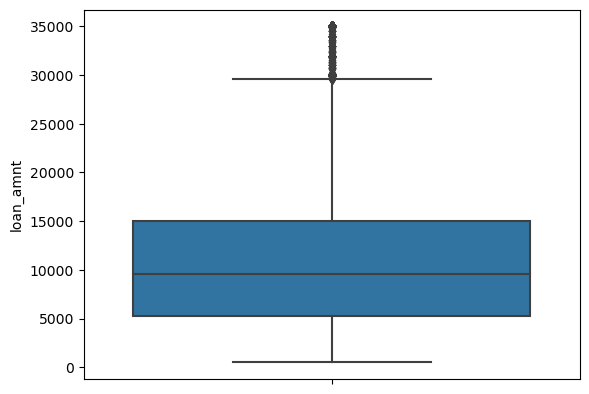

# Univariate Analysis

Now we will perform analysis on the data

We will start with analysing the distribution of loan amount.How the amount is distributed.For that we will make use of histogram.

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: ylabel='loan_amnt'>

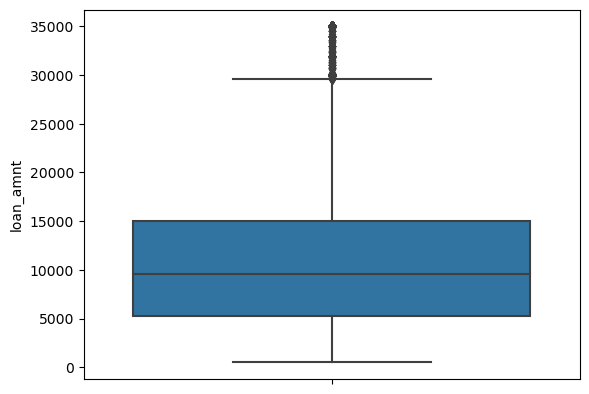

In [55]:
print(loan_df_filtered['loan_amnt'].describe())
seaborn.boxplot(y=loan_df_filtered['loan_amnt'])

<Axes: xlabel='loan_amnt', ylabel='Count'>

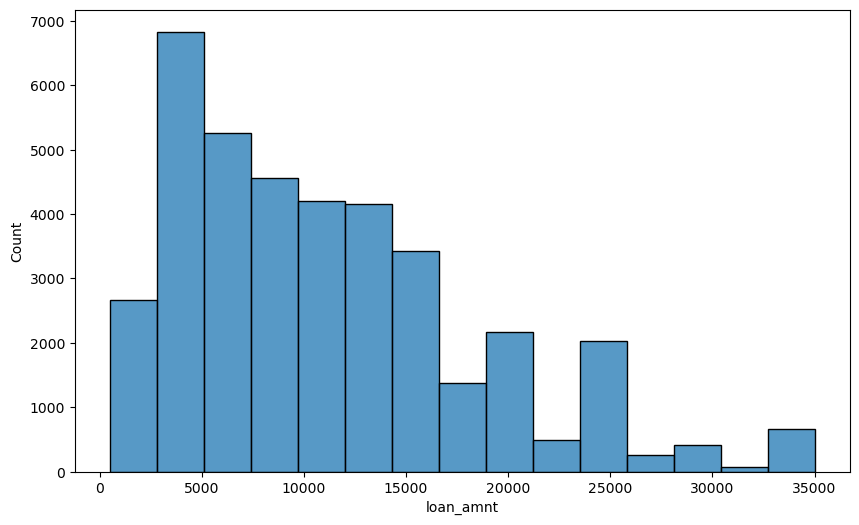

In [54]:
ax = plt.subplots(figsize=(10, 6))
seaborn.histplot(data=loan_df_filtered,x='loan_amnt',bins=15)

**It can be seen that majority of the loans are in the range 2500-5000**

We will also check the income distribution of the applicants.For that we will make use of Boxplot

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

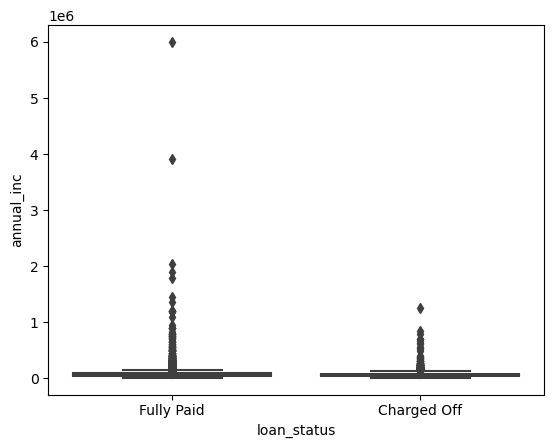

In [78]:
seaborn.boxplot(y=loan_df_filtered['annual_inc'],x=loan_df_filtered['loan_status'],data=loan_df_filtered)

We cannot make any conlcusion from the graph.We need to remove the outliers.We will make use of IQR to remove the outliers from the dataset.the minimum value will be Q1-IQR*1.5 and maximum value will be Q3+IQR*1.5

In [70]:
Q1=numpy.percentile(loan_df_filtered['annual_inc'],25)
Q3=numpy.percentile(loan_df_filtered['annual_inc'],75)
IQR=Q3-Q1
IQR

42000.0

In [71]:
upper_limit_income=Q3+1.5*IQR
lower_limit_income=Q1-1.5*IQR
print("Lower Limit {}",lower_limit_income)
print("Upper Limit {}",upper_limit_income)

Lower Limit {} -23000.0
Upper Limit {} 145000.0


In [78]:
min(loan_df_filtered['annual_inc'])

4000.0

Since there are no negative values present in the annual income field we can ignore the lower limit

We will now remove the outliers after checking the upper limit on the data



In [75]:
loan_df_filtered.drop(loan_df_filtered[(loan_df_filtered['annual_inc']>=upper_limit_income)].index,inplace=True)

<ipython-input-75-77ad039a57de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_filtered.drop(loan_df_filtered[(loan_df_filtered['annual_inc']>=upper_limit_income)].index,inplace=True)


Checking the shape of the data after removing the outliers and plotting the graph again

In [77]:
loan_df_filtered.shape()

(36754, 31)

<Axes: xlabel='loan_status', ylabel='annual_inc'>

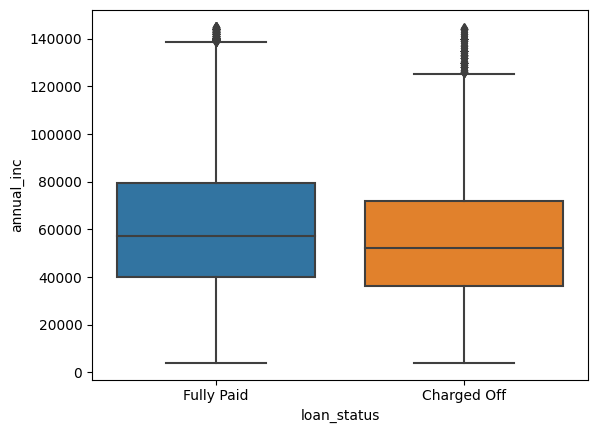

In [82]:
seaborn.boxplot(y=loan_df_filtered['annual_inc'],x=loan_df_filtered['loan_status'],data=loan_df_filtered)

Now we will check distribution of intreset rate through histplot

<Axes: xlabel='int_rate', ylabel='Count'>

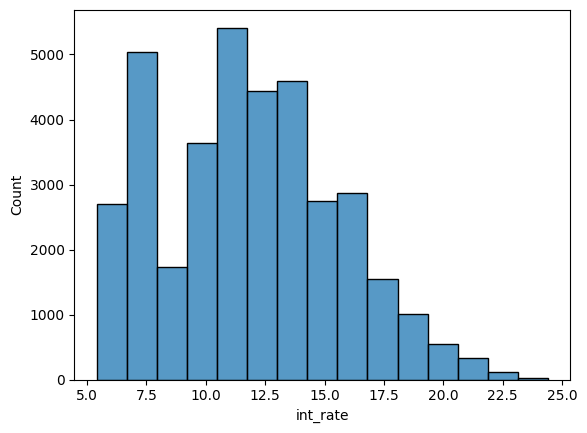

In [85]:
seaborn.histplot(data=loan_df_filtered,x='int_rate',bins=15)

**Intrest Rates between 10.5 and 12 are the highest**

Text(0.5, 1.0, 'Investor Funded Amount')

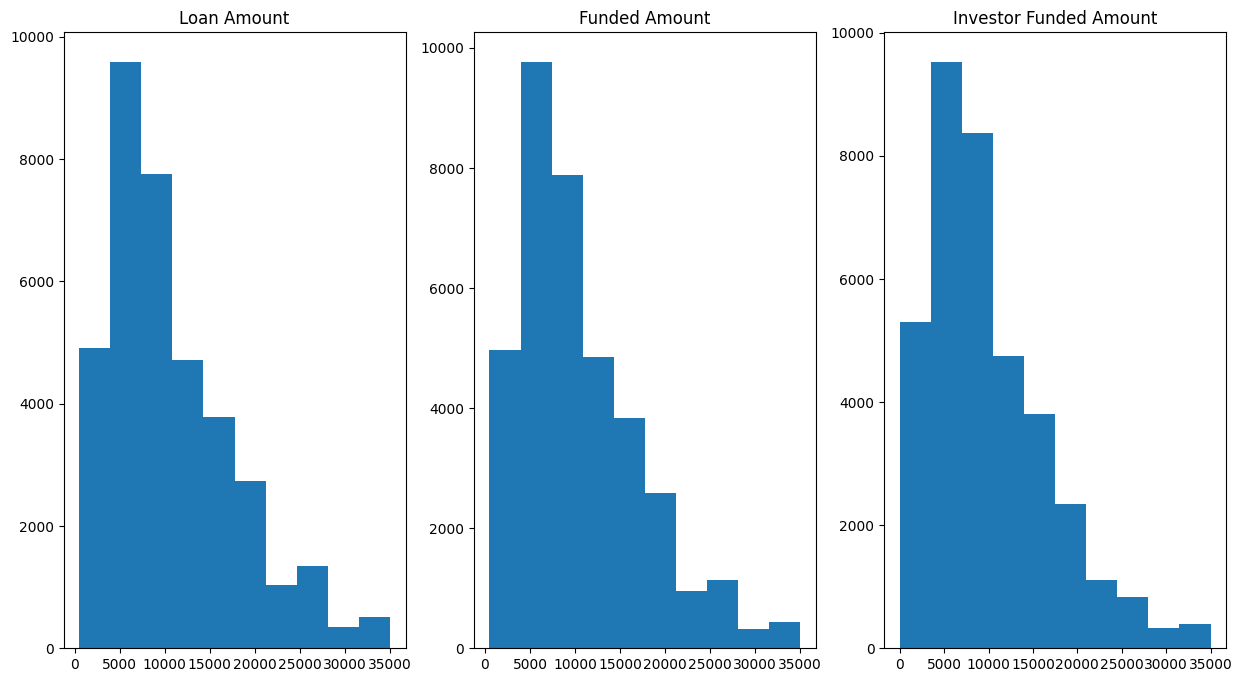

In [117]:
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
ax=plt.hist(data=loan_df_filtered,x='loan_amnt',bins=10)
plt.title("Loan Amount")
plt.subplot(1, 3, 2)
plt.hist(data=loan_df_filtered,x='funded_amnt',bins=10)
plt.title("Funded Amount")
plt.subplot(1, 3, 3)
plt.hist(data=loan_df_filtered,x='funded_amnt_inv',bins=10)
plt.title("Investor Funded Amount")


We can see that there is not a lot of difference in these Loan values





# Segmented Univariate Analysis

Getting the number of Charged Off Loan and Loans Paid in Complete

[Text(0, 0, '32950'), Text(0, 0, '5627')]

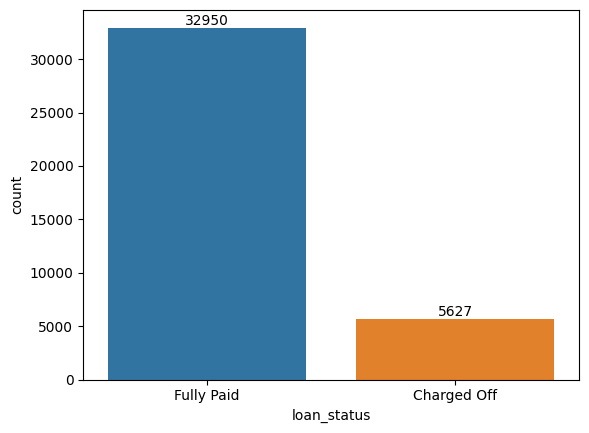

In [37]:
ax =seaborn.countplot(x=loan_df_filtered['loan_status'],data=loan_df_filtered)
ax.bar_label(ax.containers[0])

It can be seen from the above plot that we have 5627 as Charged Off Loan and Fully Paid loan are 32950

Now we will gather the categorical variables from the dataset and see the relation of Loan Default with them

#### Categorical Univariate Analysis





Checking the Grade of the Loans which are charged off

In [38]:
loan_charged_off=loan_df_filtered[(loan_df_filtered['loan_status']=='Charged Off')]

In [39]:
loan_charged_off['grade'].count()

5627

<Axes: xlabel='grade', ylabel='count'>

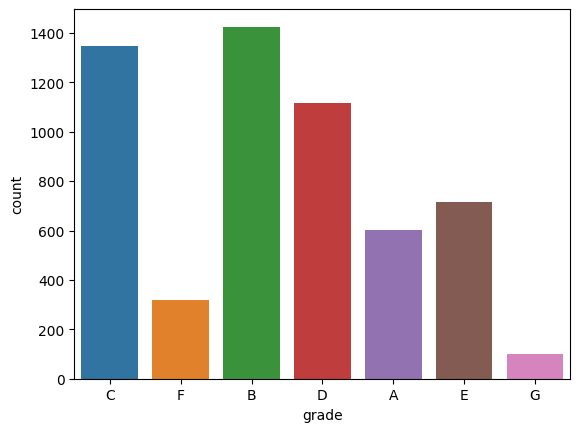

In [40]:
seaborn.countplot(x=loan_charged_off['grade'],data=loan_charged_off)

**It can be seen from the above graphical representation that Loans of Grade B are mostly defaulted**

Checking the employment tenure of the people who have defaulted on loans

<Axes: xlabel='emp_length', ylabel='count'>

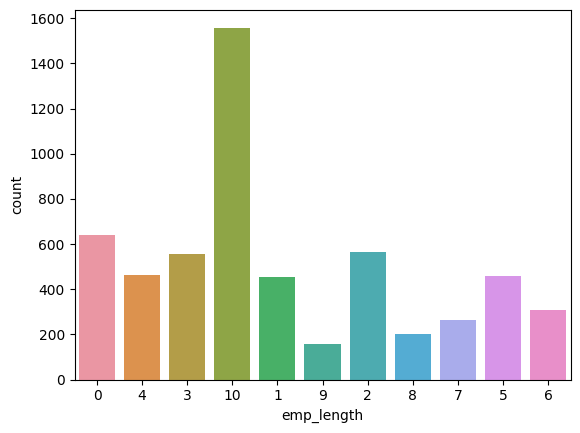

In [41]:
seaborn.countplot(x=loan_charged_off['emp_length'],data=loan_charged_off)

**It can be seen from the above graph employees which 10 or more years of experience have tendency to default on Loan**

Checking what is the status of home ownership of defaulted people

<Axes: xlabel='home_ownership', ylabel='count'>

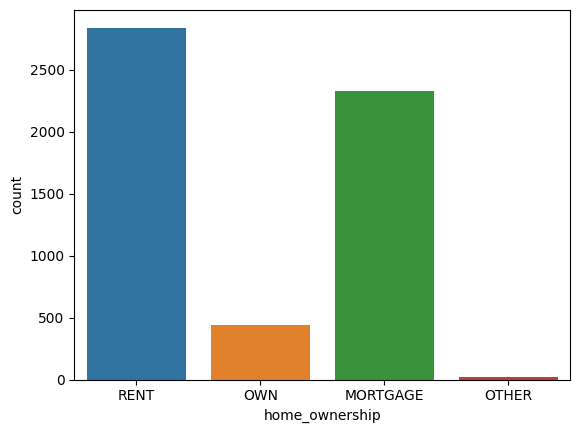

In [42]:
seaborn.countplot(x=loan_charged_off['home_ownership'],data=loan_charged_off)

**Maximum number of people who have defaulted have rented accomadation**

Now we will check from what state most of the defaulted people were

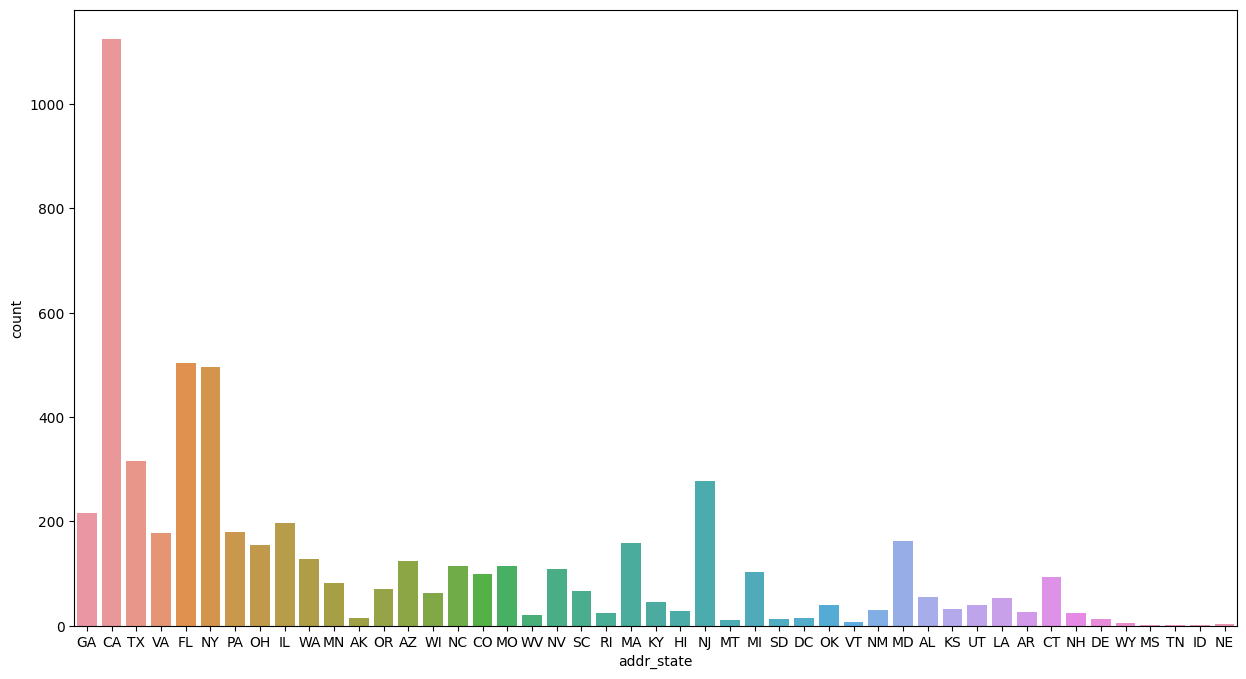

In [43]:
plt.figure(figsize=(15,8))
fig=seaborn.countplot(x=loan_charged_off['addr_state'],data=loan_charged_off)

**Majority of the defaults are happening from the state of California**

Now we will validate if the income of the applicants for defaulted loan was verified or not

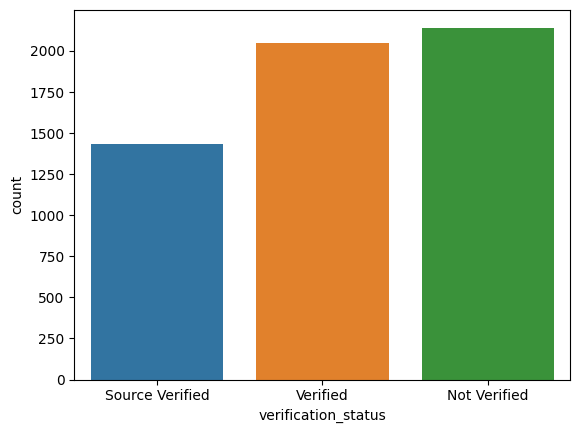

In [44]:
fig=seaborn.countplot(x=loan_charged_off['verification_status'],data=loan_charged_off)

**It is evident from the above graph that source of income of the defaulers was not verified**

Now we will check if any particular purpose of a loan plays an important part in defaulting on loan payment

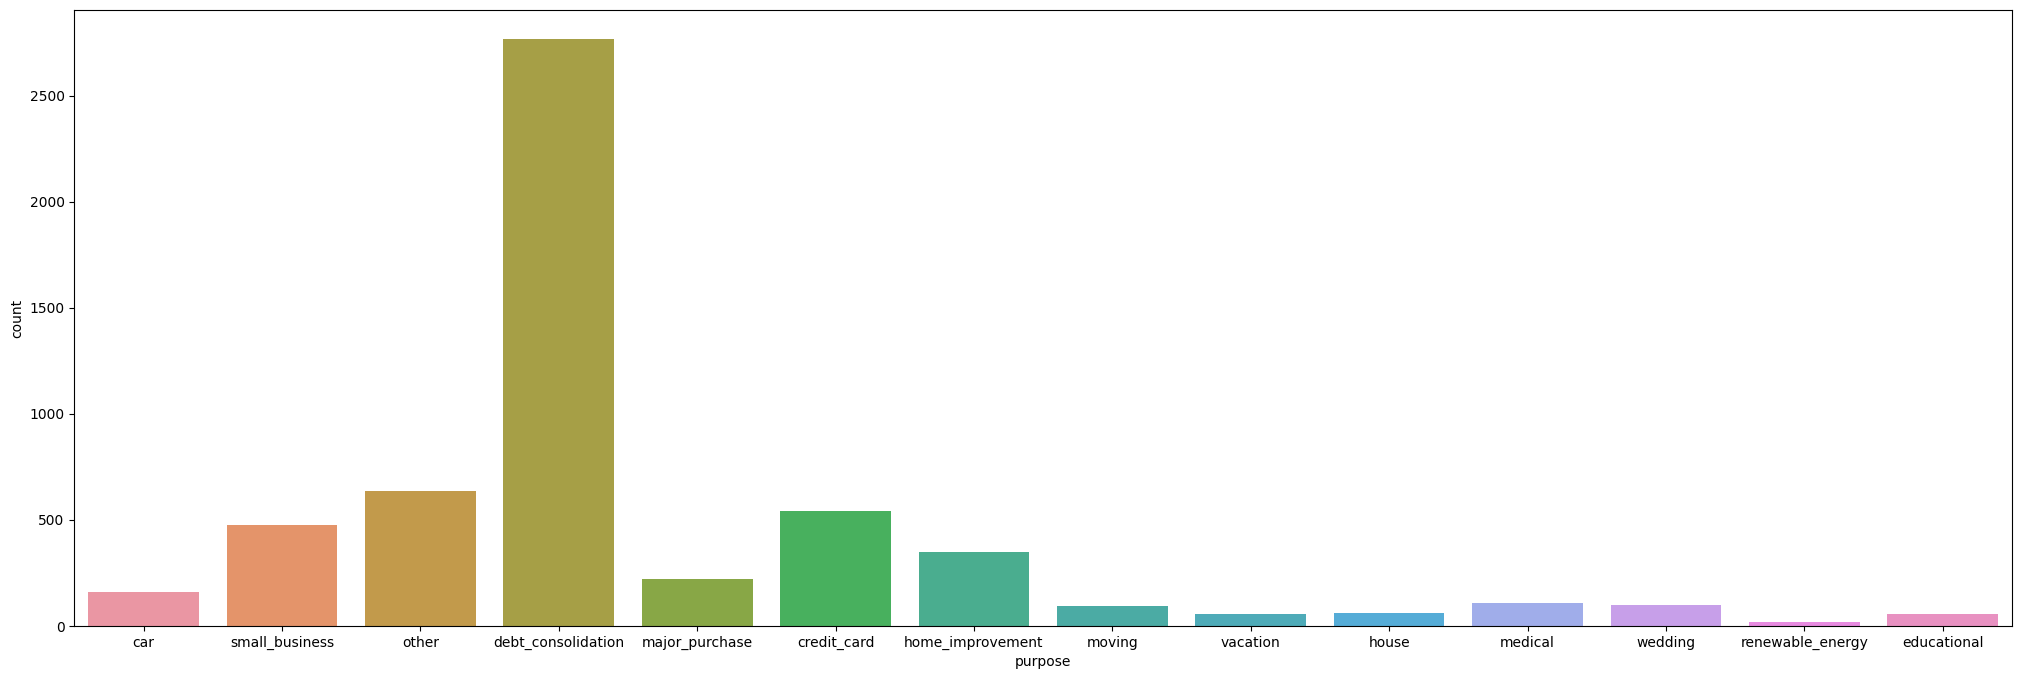

In [45]:
plt.figure(figsize=(25,8))
fig=seaborn.countplot(x=loan_charged_off['purpose'],data=loan_charged_off)

**From the above graph it could be seen that debt consolidation is the main purpose for which loan is taken and defaulted.This means that people already have certain debt on them**

Now we will see the month in which loans issued are defaulted

In [46]:
loan_charged_off['issue_d']=loan_charged_off.issue_d.apply(lambda d: datetime.strptime(d, '%b-%y'))

<ipython-input-46-a4a7f3849f57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_charged_off['issue_d']=loan_charged_off.issue_d.apply(lambda d: datetime.strptime(d, '%b-%y'))


In [47]:
loan_charged_off['issue_month']=loan_charged_off['issue_d'].dt.month
loan_charged_off['issue_year']=loan_charged_off['issue_d'].dt.year


<ipython-input-47-f4e7b97e6d0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_charged_off['issue_month']=loan_charged_off['issue_d'].dt.month
<ipython-input-47-f4e7b97e6d0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_charged_off['issue_year']=loan_charged_off['issue_d'].dt.year


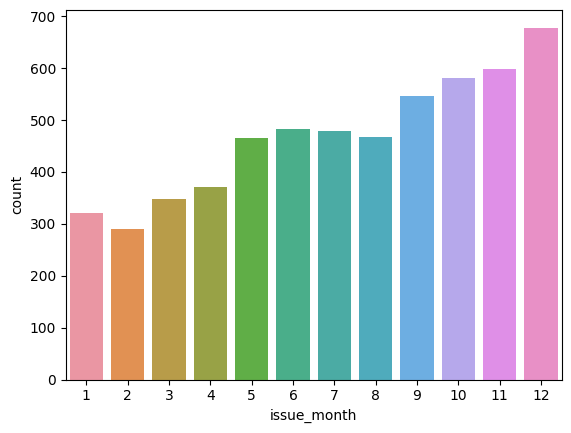

In [48]:
fig=seaborn.countplot(x=loan_charged_off['issue_month'],data=loan_charged_off)

**Most of the loans are issued in the month of December.This seems fair as it is Holiday season and people apply for loans**

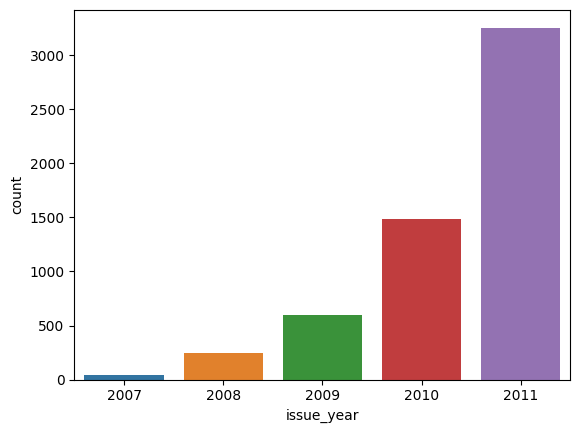

In [49]:
fig=seaborn.countplot(x=loan_charged_off['issue_year'],data=loan_charged_off)

**The number of loans issued have increased consistently and os has the default rate**

#### Univariate Loan Default Analysis with Continuous Variables

#Bivariate Analysis

# *Multivariate* Analysis

<ipython-input-119-ebd9f57cd53c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(loan_df_filtered.corr())


<Axes: >

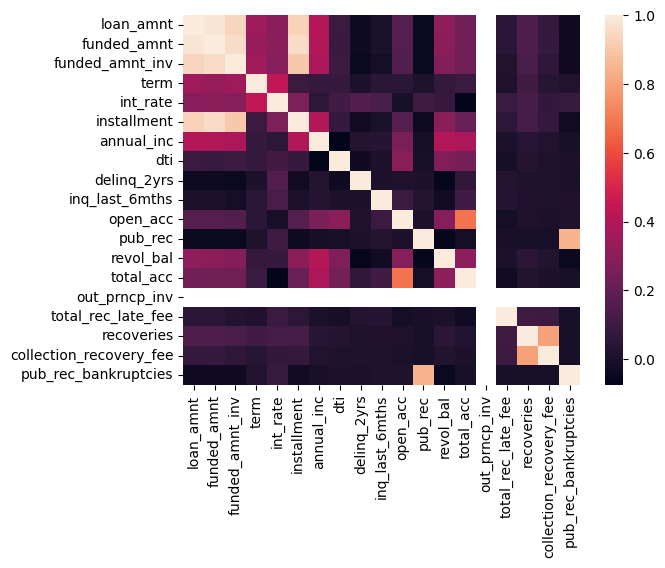

In [119]:
seaborn.heatmap(loan_df_filtered.corr())

As it can be seen from the above heat map.

1.   There is very high correlation between loan_amnt,funded_amnt,funded_amnt_inv.

2.   There is high correlation between pub_rec_bankruptcies and pub_rec

3.   There is medium correlation between open_acc and total_acc

4.   There is relatively medium correlation between term and int_rate





#Conclusion